In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

data_file = os.path.join("clean_df.csv")
raw_data = pd.read_csv(data_file)
raw_data.drop(columns="Unnamed: 0", inplace=True)

## Filter data for United Center stations

In [2]:
# Filter CTA stations by stations near the United Center
ashland_stop = raw_data.loc[raw_data["station_id"]== 40170]
il_med_dist_stop = raw_data.loc[raw_data["station_id"]== 40810]
uc_stations_data = ashland_stop.append(il_med_dist_stop)
uc_stations_data

,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
199,40170,Ashland-Lake,2017-12-01,W,2568,False,False,True,False,False
290,40170,Ashland-Lake,2017-12-28,W,1457,False,False,False,False,False
472,40170,Ashland-Lake,2017-12-29,W,1547,False,False,True,False,False
706,40170,Ashland-Lake,2017-12-07,W,2382,False,False,False,False,False
946,40170,Ashland-Lake,2017-12-09,A,1164,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
194637,40810,Medical Center,2020-09-26,A,413,False,False,False,False,False
194638,40810,Medical Center,2020-09-27,U,279,False,False,False,False,False
194639,40810,Medical Center,2020-09-28,W,842,False,False,False,False,False
194640,40810,Medical Center,2020-09-29,W,862,False,False,False,False,False


## Generate dataframes to calculate means: baseline, blackhawks & bulls ridership

In [ ]:
# Average ridership on non-game days
no_game_filter = uc_stations_data[(uc_stations_data["Blackhawks"]==False)&
                                  (uc_stations_data["Bulls"]==False)]
no_game_group = no_game_filter.groupby(["daytype",])
no_games_avg = no_game_group[["daytype","rides"]].agg(["count","mean"])
no_games_avg.columns = no_games_avg.columns.get_level_values(1)
no_games_avg.rename(columns = {"mean":"No Game Avg Rides"}, inplace=True)
no_games_avg

In [4]:
# Average ridership on blackhawks game days
hawks_games = uc_stations_data[(uc_stations_data["Blackhawks"]==True)]
hawks_daytype_group = hawks_games.groupby(["daytype"])
hawks_daytype_avg = hawks_daytype_group[["daytype","rides"]].agg(["count","mean"])
hawks_daytype_avg.columns = hawks_daytype_avg.columns.get_level_values(1)
hawks_daytype_avg.rename(columns = {"mean":"Blackhawks Avg Rides"}, inplace=True)
hawks_daytype_avg

,count,Blackhawks Avg Rides
daytype,,
A,18,1081.555556
U,62,755.354839
W,152,2586.098684


In [5]:
# Average ridership on bulls game days
bulls_games = uc_stations_data[uc_stations_data["Bulls"]==True]
bulls_daytype_group = bulls_games.groupby(["daytype"])
bulls_daytype_avg = bulls_daytype_group[["daytype","rides"]].agg(["count","mean"])
bulls_daytype_avg.columns = bulls_daytype_avg.columns.get_level_values(1)
bulls_daytype_avg.rename(columns = {"mean": "Bulls Avg Rides"}, inplace=True)
bulls_daytype_avg

,count,Bulls Avg Rides
daytype,,
A,90,1131.544444
U,40,678.575000
W,328,2463.451220


## Bar Charts
* Explore Blackhawks v Bulls data against baseline CTA data

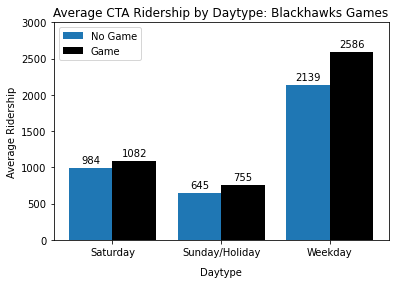

In [6]:
# Had help from code found in this video https://www.youtube.com/watch?v=ZjQCPMO7LBE
# Add team data to generate bar chart
team1_df = round(no_games_avg["No Game Avg Rides"],0).astype(int)
team2_df = round(hawks_daytype_avg["Blackhawks Avg Rides"],0).astype(int)
team1_label = "No Game"
team2_label = "Game"

# Generate bar chart
width = 0.4
labels = ["Saturday", "Sunday/Holiday", "Weekday"]
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,team1_df, width, label=team1_label)
rects2 = ax.bar(x + width/2,team2_df, width, label=team2_label, color = "black")
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Bar values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
# labels
plt.title("Average CTA Ridership by Daytype: Blackhawks Games")
plt.ylabel("Average Ridership")
plt.xlabel("Daytype", labelpad=10)
plt.ylim(0,3000)
plt.legend()
plt.show()

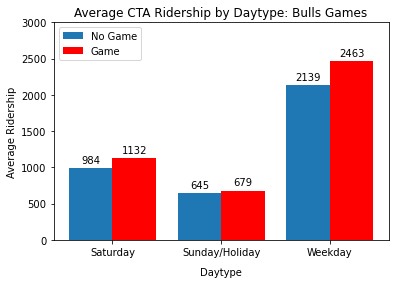

In [22]:
# Had help from code found in this video https://www.youtube.com/watch?v=ZjQCPMO7LBE
# Add team data to generate bar chart
team1_df = round(no_games_avg["No Game Avg Rides"],0).astype(int)
team2_df = round(bulls_daytype_avg["Bulls Avg Rides"]).astype(int)
team1_label = "No Game"
team2_label = "Game"

# Generate bar chart
width = 0.4
labels = ["Saturday", "Sunday/Holiday", "Weekday"]
x = np.arange(len(labels)) 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,team1_df,width,label=team1_label)
rects2 = ax.bar(x + width/2,team2_df,width,label=team2_label, color="red")
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Bar values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

# labels
plt.title("Average CTA Ridership by Daytype: Bulls Games")
plt.ylabel("Average Ridership")
plt.xlabel("Daytype", labelpad=10)
plt.ylim(0,3000)
plt.legend(loc = 2)
plt.show()

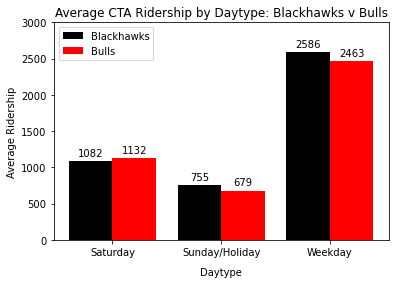

In [29]:
# Had help from code found in this video https://www.youtube.com/watch?v=ZjQCPMO7LBE
# Add team data to generate bar chart
team1_df = round(hawks_daytype_avg["Blackhawks Avg Rides"]).astype(int)
team2_df = round(bulls_daytype_avg["Bulls Avg Rides"]).astype(int)
team1_name = "Blackhawks"
team2_name = "Bulls"

# Generate bar chart
labels = ["Saturday", "Sunday/Holiday", "Weekday"]
width = 0.4
x = np.arange(len(labels)) 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,team1_df, width, label=team1_name, color = "black")
rects2 = ax.bar(x + width/2,team2_df, width, label=team2_name, color="red")
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Bar values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

# labels
plt.title("Average CTA Ridership by Daytype: Blackhawks v Bulls")
plt.ylabel("Average Ridership")
plt.xlabel("Daytype", labelpad=10)
plt.ylim(0,3000)
plt.legend(loc = 2)
plt.show()

## Boxplot & Anova Model
* Used variables to quickly generate charts for different teams
* Check if the difference between the means are statistically significant

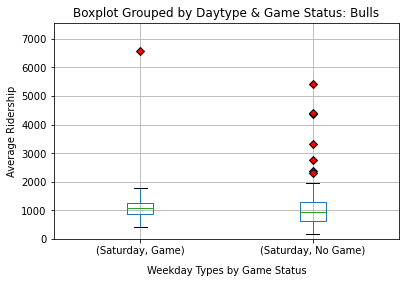

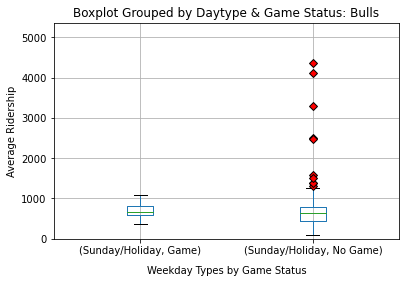

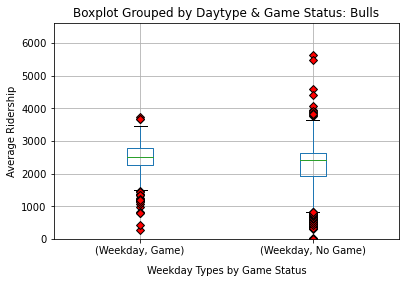

In [14]:
boxplot_team = "Bulls"
# Rename values for boxplots
boxplot_df = uc_stations_data.copy()
boxplot_df.loc[(boxplot_df["daytype"] == "A"), "daytype"] = "Saturday"
boxplot_df.loc[(boxplot_df["daytype"] == "U"), "daytype"] = "Sunday/Holiday"
boxplot_df.loc[(boxplot_df["daytype"] == "W"), "daytype"] = "Weekday"
boxplot_df.loc[(boxplot_df[boxplot_team] == True), boxplot_team] = "Game"
boxplot_df.loc[(boxplot_df[boxplot_team] == False), boxplot_team] = "No Game"

# Filter for each boxplot
saturday_df = boxplot_df[boxplot_df["daytype"]== "Saturday"]
sunday_df = boxplot_df[boxplot_df["daytype"]== "Sunday/Holiday"]
weekday_df = boxplot_df[boxplot_df["daytype"]== "Weekday"]


# Outlier format
red_square = dict(markerfacecolor='r', marker='D')

saturday_df.boxplot("rides", by=["daytype", boxplot_team],flierprops=red_square)
# Get rid of auto generated title
plt.suptitle('')
# Add labels & format
plt.title(f"Boxplot Grouped by Daytype & Game Status: {boxplot_team}")
plt.xlabel("Weekday Types by Game Status", labelpad=10)
plt.ylabel("Average Ridership")
plt.ylim(0,max(saturday_df["rides"])+1000)


sunday_df.boxplot("rides", by=["daytype", boxplot_team],flierprops=red_square)
# Get rid of auto generated title
plt.suptitle('')
# Add labels & format
plt.title(f"Boxplot Grouped by Daytype & Game Status: {boxplot_team}")
plt.xlabel("Weekday Types by Game Status", labelpad=10)
plt.ylabel("Average Ridership")
plt.ylim(0,max(sunday_df["rides"])+1000)


weekday_df.boxplot("rides", by=["daytype", boxplot_team],flierprops=red_square)
# Get rid of auto generated title
plt.suptitle('')
# Add labels & format
plt.title(f"Boxplot Grouped by Daytype & Game Status: {boxplot_team}")
plt.xlabel("Weekday Types by Game Status", labelpad=10)
plt.ylabel("Average Ridership")
plt.ylim(0,max(weekday_df["rides"])+1000)

plt.show()

## ANOVA calculation to compare means

In [31]:
# Team variable
anova_team = "Bulls"

# Dataframe formatting 
sat_game = boxplot_df[(boxplot_df["daytype"] == "Saturday")&(boxplot_df[anova_team]=="Game")]["rides"]
sat_no_game = boxplot_df[(boxplot_df["daytype"] == "Saturday")&(boxplot_df[anova_team]=="No Game")]["rides"]
sun_game = boxplot_df[(boxplot_df["daytype"] == "Sunday/Holiday")&(boxplot_df[anova_team]=="Game")]["rides"]
sun_no_game = boxplot_df[(boxplot_df["daytype"] == "Sunday/Holiday")&(boxplot_df[anova_team]=="No Game")]["rides"]
weekday_game = boxplot_df[(boxplot_df["daytype"] == "Weekday")&(boxplot_df[anova_team]=="Game")]["rides"]
weekday_no_game = boxplot_df[(boxplot_df["daytype"] == "Weekday")&(boxplot_df[anova_team]=="No Game")]["rides"]

# Anova statistic to detect statistical difference
saturday = stats.f_oneway(sat_game,sat_no_game)
sunday = stats.f_oneway(sun_game, sun_no_game)
weekday = stats.f_oneway(weekday_game, weekday_no_game)
print(f'''
Team: {anova_team} 
Saturday: {saturday}
  Sunday: {sunday}
  Weekday: {weekday}
  ''')


Team: Bulls 
Saturday: F_onewayResult(statistic=3.8890214719567497, pvalue=0.049312564058412535)
  Sunday: F_onewayResult(statistic=0.08110067027003401, pvalue=0.7759471601159668)
  Weekday: F_onewayResult(statistic=35.80801322771537, pvalue=2.5937901182414625e-09)
  
